In [91]:
#Dependencies
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import squarify
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
import numpy as np
import seaborn as sns

sns.set_style("white")

from pprint import pprint
from config import api_key

#Convert Gold Tier 1 URL to DF
gold_url = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/I?page=1&api_key=" + api_key
gold_data = requests.get(gold_url).json()
gold_data_df = pd.DataFrame(gold_data)

#Convert Gold Tier 2 URL to DF
gold_url2 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/II?page=1&api_key=" + api_key
gold_data2 = requests.get(gold_url2).json()
gold_data_df2 = pd.DataFrame(gold_data2)

#Convert Gold Tier 3 URL to DF
gold_url3 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/III?page=1&api_key=" + api_key
gold_data3 = requests.get(gold_url3).json()
gold_data_df3 = pd.DataFrame(gold_data3)

#Convert Gold Tier 4 URL to DF
gold_url4 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/IV?page=1&api_key=" + api_key
gold_data4 = requests.get(gold_url4).json()
gold_data_df4 = pd.DataFrame(gold_data4)

#Merge all DF into one using Concat
GDF = [gold_data_df, gold_data_df2, gold_data_df3, gold_data_df4]
gold_df = pd.concat(GDF)

#Drop unneeded columns - Clean Gold DF
clean_gold_df = gold_df.drop(columns=['queueType', 'summonerName', 'inactive', 'freshBlood', 'hotStreak', 'miniSeries'])

#Add all Gold summoner ids to a list
gold_summonerId_list = list(gold_df['summonerId'])

#Convert Platinum Tier 1 URL to DF
platinum_url = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/I?page=1&api_key=" + api_key
platinum_data = requests.get(platinum_url).json()
platinum_data_df = pd.DataFrame(platinum_data)

#Convert Platinum Tier 2 URL to DF
platinum_url2 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/II?page=1&api_key=" + api_key
platinum_data2 = requests.get(platinum_url2).json()
platinum_data_df2 = pd.DataFrame(platinum_data2)

#Convert Platinum Tier 3 URL to DF
platinum_url3 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/III?page=1&api_key=" + api_key
platinum_data3 = requests.get(platinum_url3).json()
platinum_data_df3 = pd.DataFrame(platinum_data3)

#Convert Platinum Tier 4 URL to DF
platinum_url4 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/IV?page=1&api_key=" + api_key
platinum_data4 = requests.get(platinum_url4).json()
platinum_data_df4 = pd.DataFrame(platinum_data4)

#Merge all DF into one using Concat
PDF = [platinum_data_df, platinum_data_df2, platinum_data_df3, platinum_data_df4]
platinum_df = pd.concat(PDF)

#Drop unneeded columns - Clean Platinum DF
clean_platinum_df = platinum_df.drop(columns=['queueType', 'summonerName', 'inactive', 'freshBlood', 'hotStreak', 'miniSeries'])

#Add all platinum summoner ids to a list
platinum_summonerId_list = list(platinum_df['summonerId'])

In [2]:
#Looping through top 100 summoners in Gold Tier and outputting data for champion they last used.
gold_summonerId = gold_summonerId_list[:100]

first_championID_list_gold = []
for i in gold_summonerId:
    gold_url2 = "https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + i + "?api_key=" + api_key
    response = requests.get(gold_url2).json()
    first_championID_gold = response[0]
    first_championID_list_gold.append(first_championID_gold)
    
first_championID_list_gold_DF = pd.DataFrame(first_championID_list_gold)


KeyError: 0

In [3]:
#Looping through top 100 summoners in Platinum Tier and outputting data for champion they last used.
platinum_summonerId = platinum_summonerId_list[:100]

first_championID_list_platinum = []
for j in platinum_summonerId:
    platinum_url2 = "https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + j + "?api_key=" + api_key
    response2 = requests.get(platinum_url2).json()
    first_championID_platinum = response2[0]
    first_championID_list_platinum.append(first_championID_platinum)
    
first_championID_list_plat_DF = pd.DataFrame(first_championID_list_platinum)

first_championID_list_plat_DF

KeyError: 0

In [4]:
#Pull Data from DataDragon to create DF of Champion name with their ChampionID
champions_data = pd.read_json(r'file:///Users/jw/Downloads/dragontail-10.21.1/10.21.1/data/en_US/champion.json')

#Initialising_dictionary
champion_dict = champions_data['data']

#Split Dictionary into Keys and Values
character = []
values = []
items = champion_dict.items()
for item in items:
    character.append(item[0]), values.append(item[1])

ID = []
for v in values:
    ID.append(v['key'])

Role = []
for x in values:
    Role.append(x['tags'][0])

champion_data_1 = pd.DataFrame({"Champion Name": character, "championId": ID, "Primary Role": Role})

#change data type to int64 - in order to merge 
champion_data_1['championId'] = champion_data_1['championId'].astype(str).astype(int).round(0)

In [5]:
#Make full gold DF - ready for analysis
full_summoner_mastery = pd.read_csv('summoner_champion.csv')

final_gold_df = full_summoner_mastery[full_summoner_mastery["tier"] == "GOLD"]

gold_combined_df = pd.merge(final_gold_df, champion_data_1, how = 'left', on = 'championId')

del gold_combined_df["Champion Name_x"]

gold_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)


In [66]:
gold_combined_df.head()

,leagueId,queueType,tier,rank,summonerId,summonerName,leaguePoints,wins,losses,veteran,...,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned,Champion Name,Primary Role
0,57792419-29e0-4537-b8cb-d31c49a7d470,RANKED_SOLO_5x5,GOLD,III,NpEqrTN_UAvqF4JLFPRZk3DPlzmKUP5TE6rOR8mSq6nwitI,BigDvid,77,160,141,False,...,107.0,7.0,114986.0,1.603390e+12,93386.0,0.0,True,0.0,Rengar,Assassin
1,0bb61afe-ee83-4511-b3db-5c0004c12f2f,RANKED_SOLO_5x5,GOLD,III,evS5a91zJez2Ktp6sPJpd4qkjUJayZzvi_4raOqDF4ogFaQ,Anthony1,78,480,484,False,...,131.0,7.0,285986.0,1.602980e+12,264386.0,0.0,True,0.0,Diana,Fighter
2,fb2bdc6a-ecd7-4806-a7d1-198ae48f5820,RANKED_SOLO_5x5,GOLD,III,HF-D5Ecf5W2xzr12HZp4f0lpasnLDMouFMRvP4WWcfUydDk,Warm Toast,19,252,270,False,...,60.0,7.0,122004.0,1.599520e+12,100404.0,0.0,True,0.0,Elise,Mage
3,e543cb49-c34a-4b4f-a321-0bd63cc585b3,RANKED_SOLO_5x5,GOLD,III,BQ26hJkHXIA-mfBFqVjRMdw8ZoU5c0-5qUwNFK_W3P6cgtc,Biggie Big,0,45,24,False,...,54.0,7.0,117354.0,1.574760e+12,95754.0,0.0,False,0.0,Malphite,Tank
4,07fc68c9-55c3-4fe0-948b-f52d19668e02,RANKED_SOLO_5x5,GOLD,III,bpKj7d5Xjqjx8QvEYI1AgP7b3y--vTtx16Sn30O9SEfbFT5U,Greenheaene,6,108,102,False,...,131.0,4.0,19578.0,1.580610e+12,6978.0,2022.0,True,0.0,Diana,Fighter


(0.0, 100.0, 0.0, 100.0)

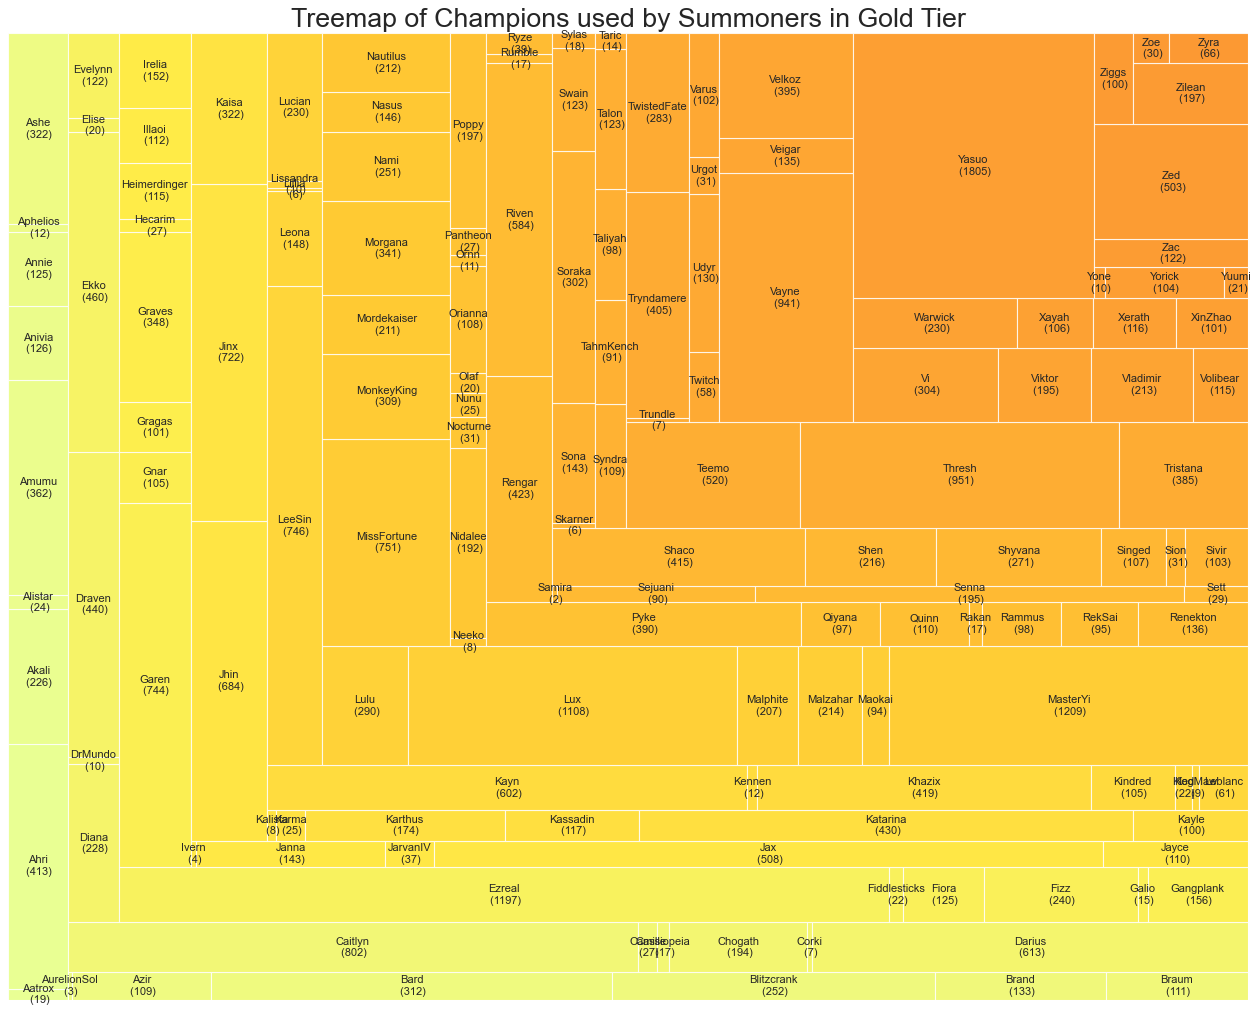

In [20]:
#TreeMap of Summoners in Gold Tier
treemap_1 = gold_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Wistia')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Gold Tier', fontsize=24)
plt.axis('off')


#plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Full_Gold_Treemap.png")

In [57]:
#Average amount of wins for summoner in Gold Tier
gold_wins_avg = round(gold_combined_df['wins'].mean())
#Average amount of losses for summoner in Gold Tier
gold_loss_avg = round(gold_combined_df['losses'].mean())

print("The Average Amount of wins for summoner in Gold Tier :" , gold_wins_avg)
print("The Average Amount of losses for summoner in Gold Tier :" , gold_loss_avg)

The Average Amount of wins for summoner in Gold Tier : 124
The Average Amount of losses for summoner in Gold Tier : 122


In [8]:
## Broken - trying to change champion name datatype to int in order to run mean, mode, median
#gold_combined_df['Champion Name'] = gold_combined_df['Champion Name'].astype(str).astype(int).round(0)

#gold_combined_df.dtypes

In [9]:
## Broken - trying to change champion name datatype to int in order to run mean, mode, median
#gold_combined_df['Champion Name'] = gold_combined_df['Champion Name'].astype(str)

#df = gold_combined_df['Champion Name']

#df.count[0]

In [10]:
#Make full platinum DataFrame - everything we need for analysis
final_platinum_df = full_summoner_mastery[full_summoner_mastery["tier"] == "PLATINUM"]

#Merge full platinum DF with champion data
platinum_combined_df = pd.merge(final_platinum_df, champion_data_1, how = 'left', on = 'championId')

#Delete duplicate column
del platinum_combined_df["Champion Name_x"]

#Rename column
platinum_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

(0.0, 100.0, 0.0, 100.0)

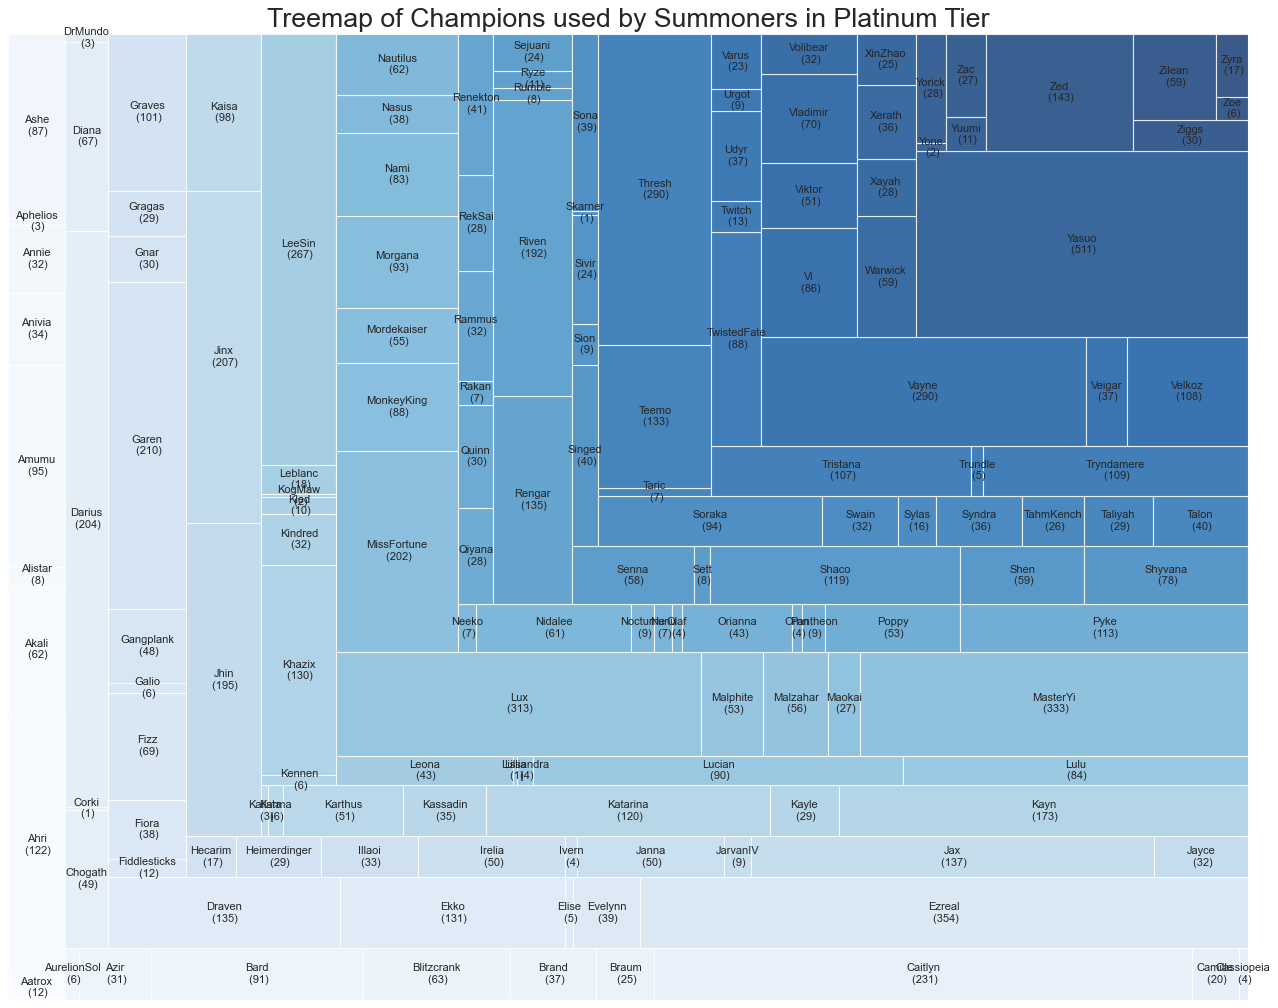

In [40]:
#Make Treemap of Champions used by summoners in Platinum Tier
treemap_1 = platinum_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Blues')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Platinum Tier', fontsize=24)
plt.axis('off')

#plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Full_Platinum_Treemap.png")

In [60]:
#Average amount of wins for summoner in Platinum Tier
plat_wins_avg = round(platinum_combined_df['wins'].mean())
#Average amount of losses for summoner in Platinum Tier
plat_loss_avg = round(platinum_combined_df['losses'].mean())

print("The Average Amount of wins for summoner in Gold Tier :" , plat_wins_avg)
print("The Average Amount of losses for summoner in Gold Tier :" , plat_loss_avg)

The Average Amount of wins for summoner in Gold Tier : 183
The Average Amount of losses for summoner in Gold Tier : 177


In [12]:
#Make Full Iron DF - Ready for analysis
final_iron_df = full_summoner_mastery[full_summoner_mastery["tier"] == "IRON"]

iron_combined_df = pd.merge(final_iron_df, champion_data_1, how = 'left', on = 'championId')

del iron_combined_df["Champion Name_x"]

iron_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)


(0.0, 100.0, 0.0, 100.0)

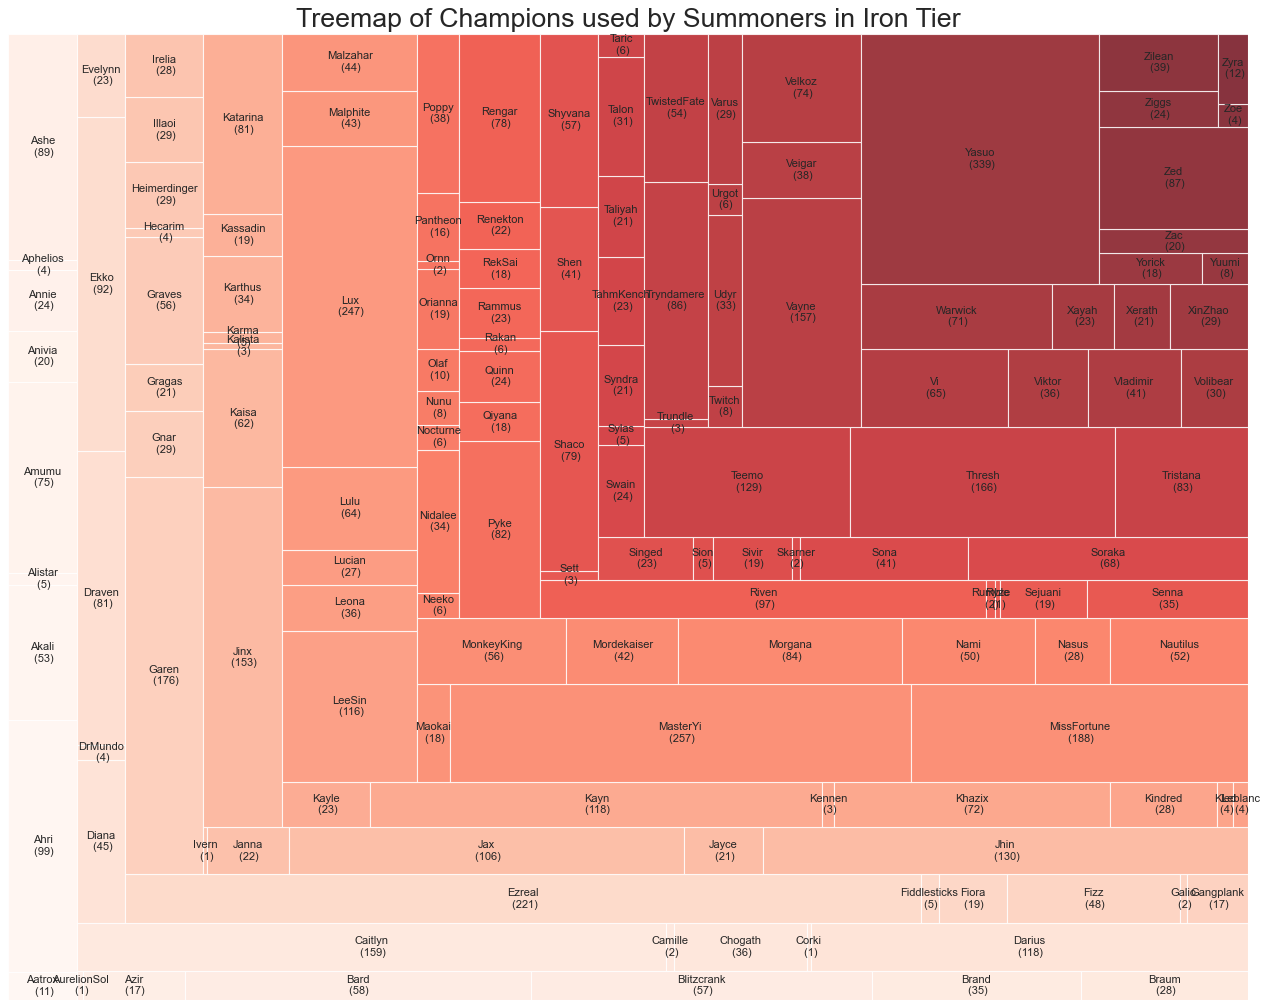

In [124]:
#Make Iron Iron TreeMap
treemap_1 = iron_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Reds')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Iron Tier', fontsize=24)
plt.axis('off')

In [61]:
#Average amount of wins for summoner in Iron Tier
iron_wins_avg = round(iron_combined_df['wins'].mean())
#Average amount of losses for summoner in Iron Tier
iron_loss_avg = round(iron_combined_df['losses'].mean())

print("The Average Amount of wins for summoner in Iron Tier :" , iron_wins_avg)
print("The Average Amount of losses for summoner in Iron Tier :" , iron_loss_avg)

The Average Amount of wins for summoner in Iron Tier : 12
The Average Amount of losses for summoner in Iron Tier : 18


In [14]:
#Make Full bronze DF - ready for analysis
final_bronze_df = full_summoner_mastery[full_summoner_mastery["tier"] == "BRONZE"]

bronze_combined_df = pd.merge(final_bronze_df, champion_data_1, how = 'left', on = 'championId')

del bronze_combined_df["Champion Name_x"]

bronze_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

(0.0, 100.0, 0.0, 100.0)

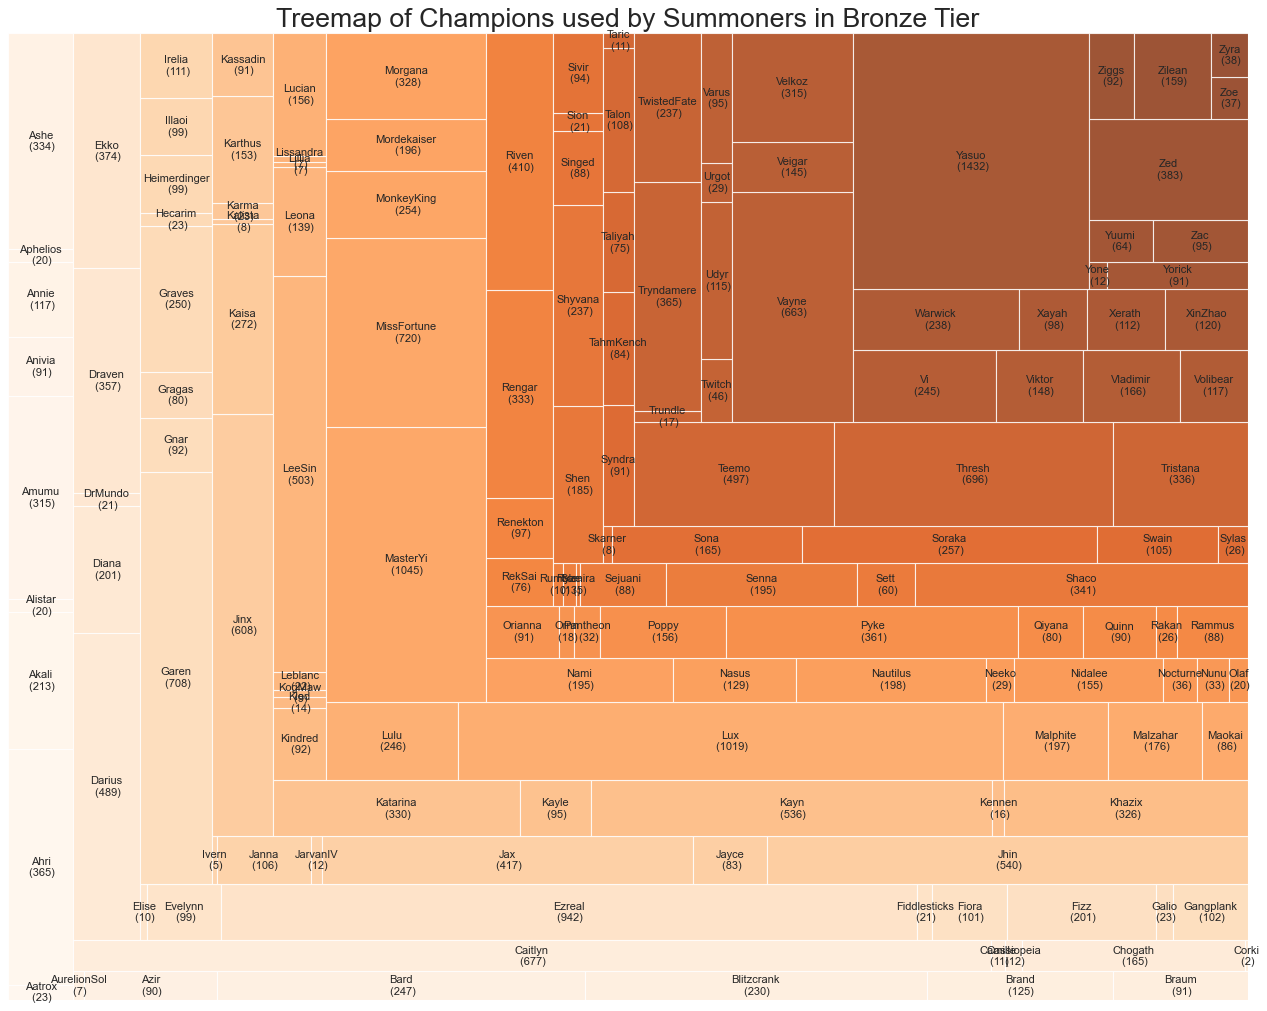

In [15]:
#Bronze TreeMap
treemap_1 = bronze_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Oranges')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Bronze Tier', fontsize=24)
plt.axis('off')

In [62]:
#Average amount of wins for summoner in Bronze Tier
bronze_wins_avg = round(bronze_combined_df['wins'].mean())
#Average amount of losses for summoner in Bronze Tier
bronze_loss_avg = round(bronze_combined_df['losses'].mean())

print("The Average Amount of wins for summoner in Iron Tier :" , bronze_wins_avg)
print("The Average Amount of losses for summoner in Iron Tier :" , bronze_loss_avg)

The Average Amount of wins for summoner in Iron Tier : 30
The Average Amount of losses for summoner in Iron Tier : 36


In [16]:
#Full Silver DataFrame
final_silver_df = full_summoner_mastery[full_summoner_mastery["tier"] == "SILVER"]
silver_combined_df = pd.merge(final_silver_df, champion_data_1, how = 'left', on = 'championId')

del silver_combined_df["Champion Name_x"]

silver_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

(0.0, 100.0, 0.0, 100.0)

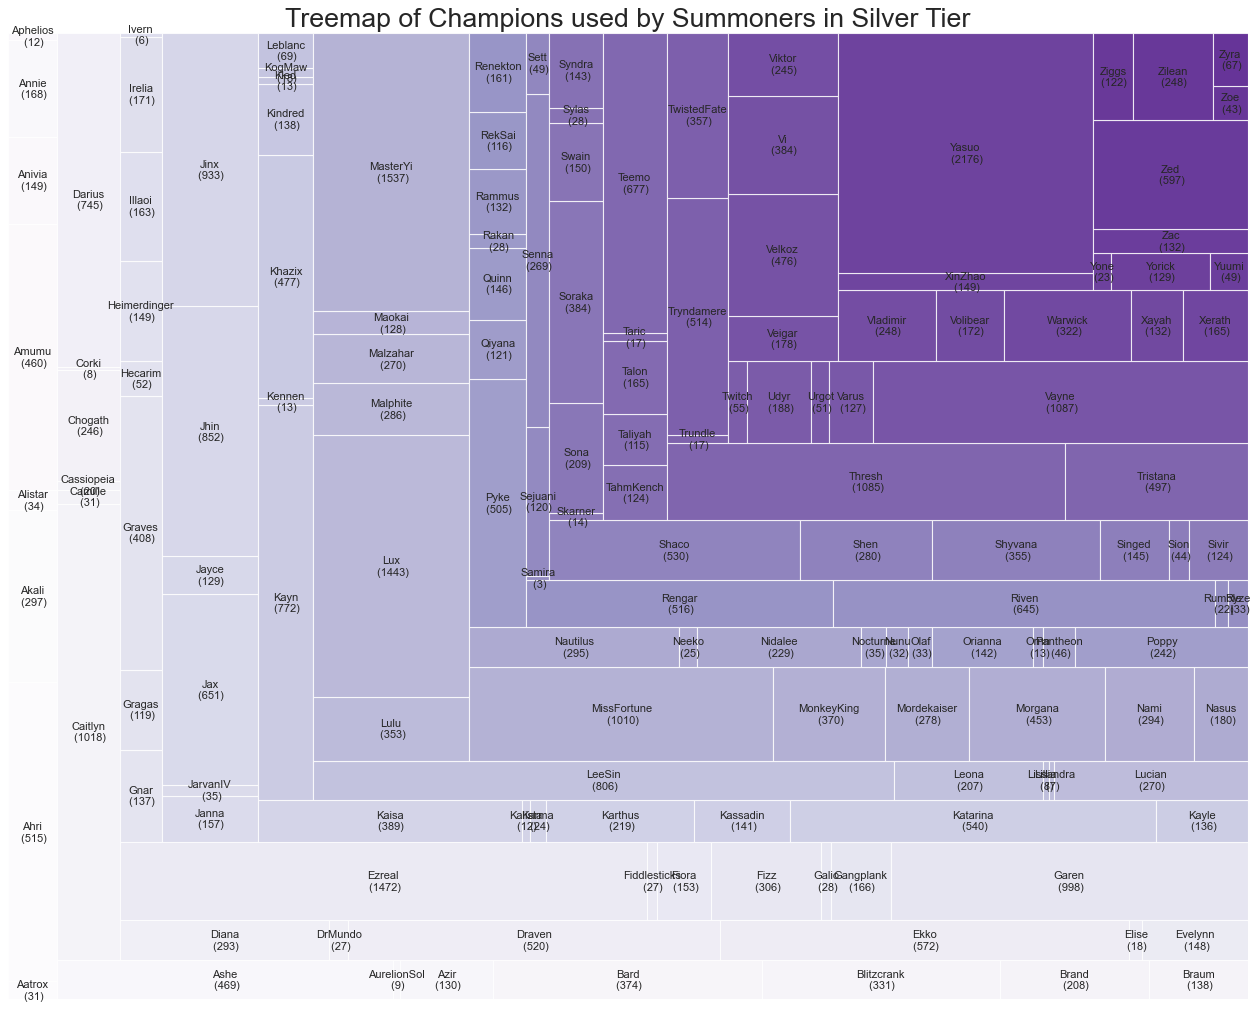

In [126]:
#Silver TreeMap
treemap_1 = silver_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Purples')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Silver Tier', fontsize=24)
plt.axis('off')

In [63]:
#Average amount of wins for summoner in Silver Tier
silver_wins_avg = round(silver_combined_df['wins'].mean())
#Average amount of losses for summoner in Silver Tier
silver_loss_avg = round(silver_combined_df['losses'].mean())

print("The Average Amount of wins for summoner in Iron Tier :" , silver_wins_avg)
print("The Average Amount of losses for summoner in Iron Tier :" , silver_loss_avg)

The Average Amount of wins for summoner in Iron Tier : 75
The Average Amount of losses for summoner in Iron Tier : 79


In [18]:
#Full DataFrame for Diamond, Master, GrandMaster and Challenger - combined into one
Diamond = full_summoner_mastery[full_summoner_mastery["tier"] == "DIAMOND"]
Master = full_summoner_mastery[full_summoner_mastery["tier"] == "MASTER"]
Grandmaster = full_summoner_mastery[full_summoner_mastery["tier"] == "GRANDMASTER"]
Challenger = full_summoner_mastery[full_summoner_mastery["tier"] == "CHALLENGER"]

DMGC = [Diamond, Master, Grandmaster, Challenger]
DMGC_df = pd.concat(DMGC)

DMGC_combined_df = pd.merge(DMGC_df, champion_data_1, how = 'left', on = 'championId')


del DMGC_combined_df["Champion Name_x"]

DMGC_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)


(0.0, 100.0, 0.0, 100.0)

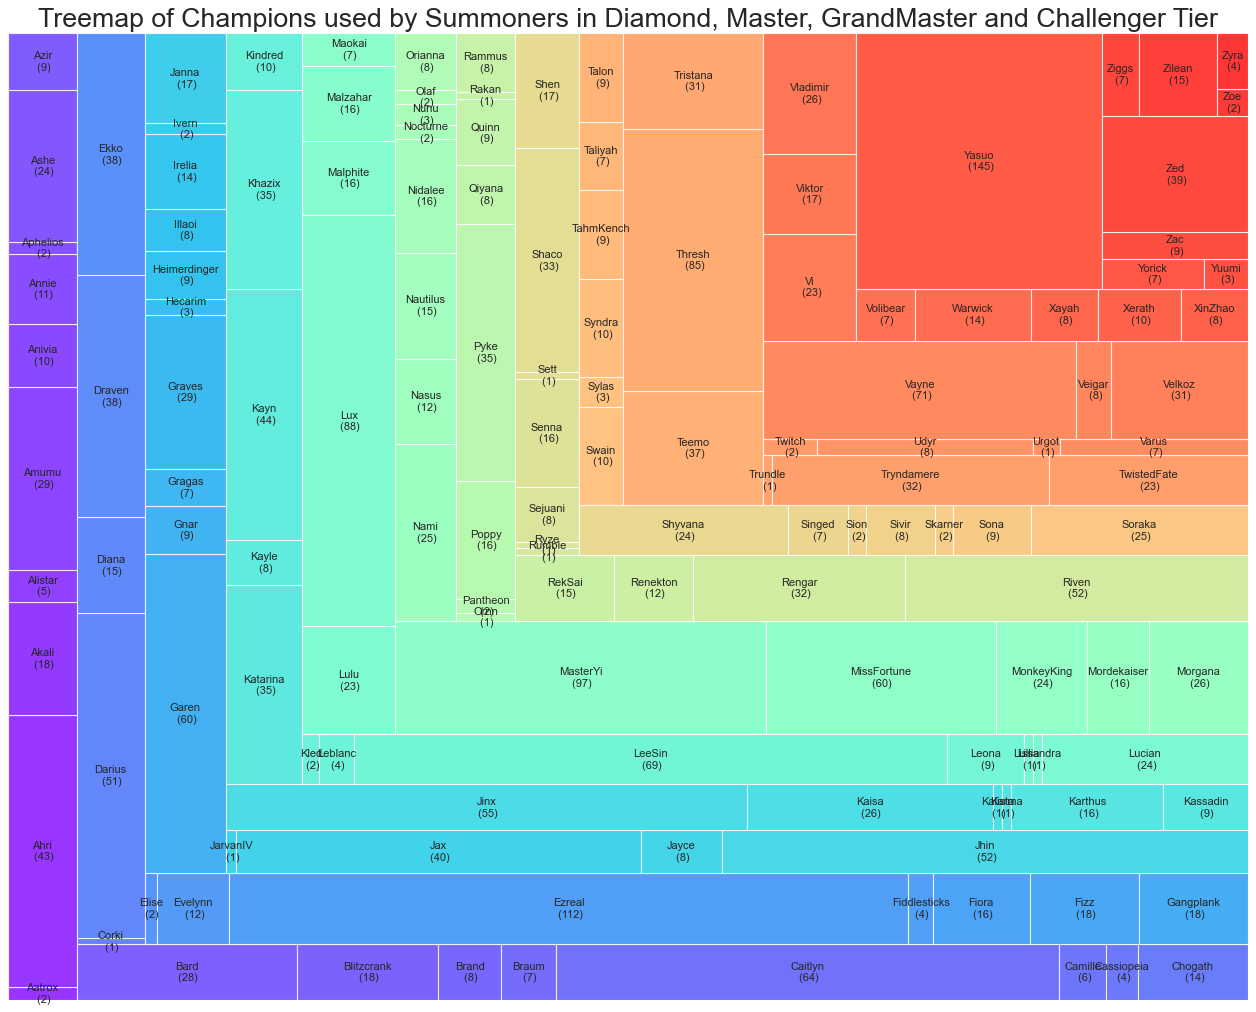

In [50]:
#TreeMap for Diamond, Master, GrandMaster and Challenger Tier
treemap_1 = DMGC_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('rainbow')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Diamond, Master, GrandMaster and Challenger Tier', fontsize=24)
plt.axis('off')

In [65]:
#Average amount of wins for summoner in Top 4 Tiers
DMGC_wins_avg = round(DMGC_combined_df['wins'].mean())
#Average amount of losses for summoner in Top 4 Tiers
DMGC_loss_avg = round(DMGC_combined_df['losses'].mean())

print("The Average Amount of wins for summoner in the Top 4 Tiers :" , DMGC_wins_avg)
print("The Average Amount of losses for summoner in the Top 4 Tier :" , DMGC_loss_avg)

The Average Amount of wins for summoner in the Top 4 Tiers : 174
The Average Amount of losses for summoner in the Top 4 Tier : 161


(0.0, 100.0, 0.0, 100.0)

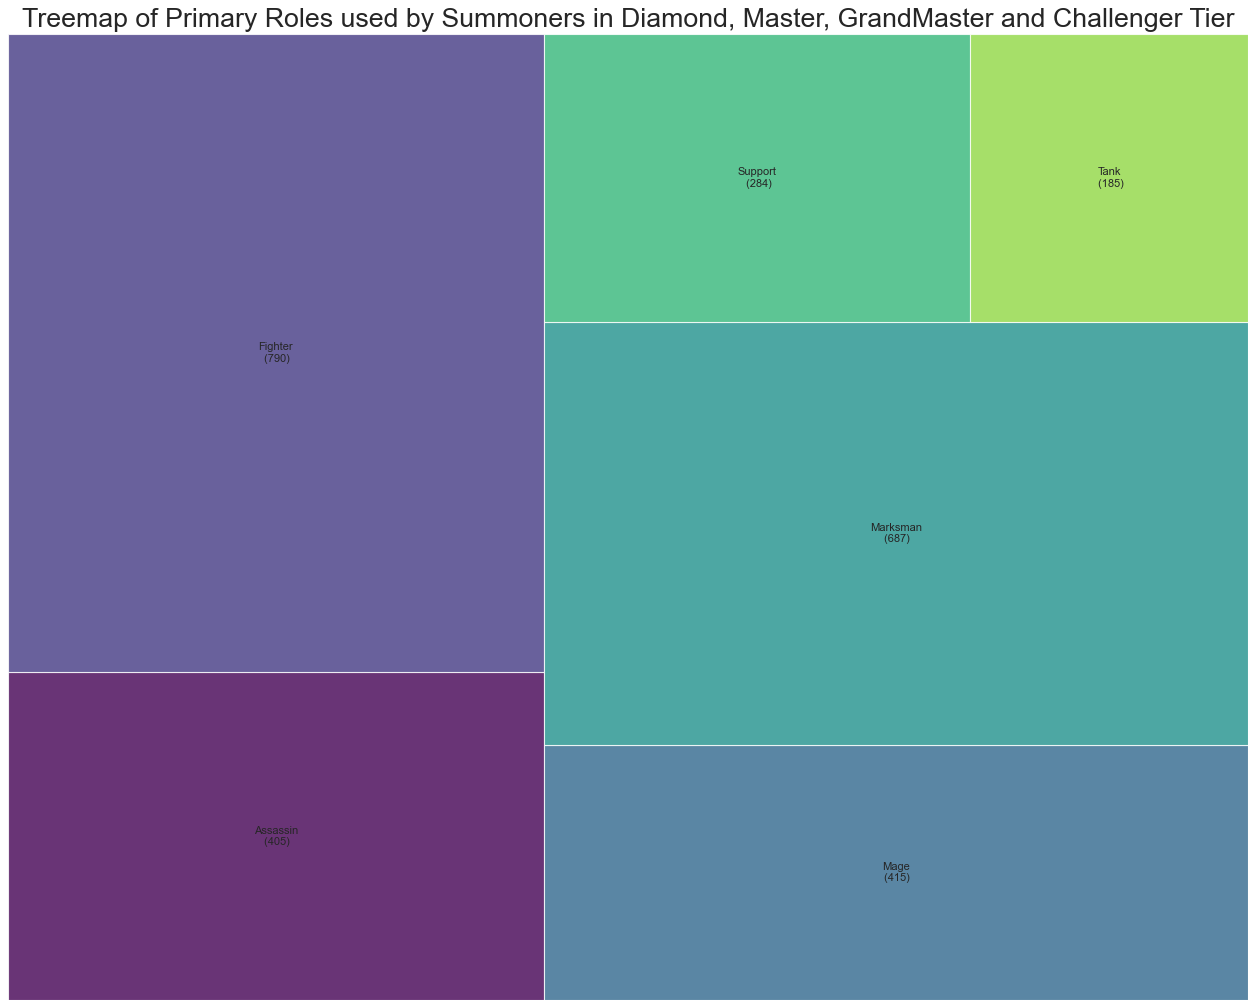

In [117]:
#TreeMap showing Primary Role used by summoners in Diamond, Master and GrandMaster Tier
treemap_1 = DMGC_combined_df.groupby('Primary Role').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('viridis')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Primary Roles used by Summoners in Diamond, Master, GrandMaster and Challenger Tier', fontsize=24)
plt.axis('off')

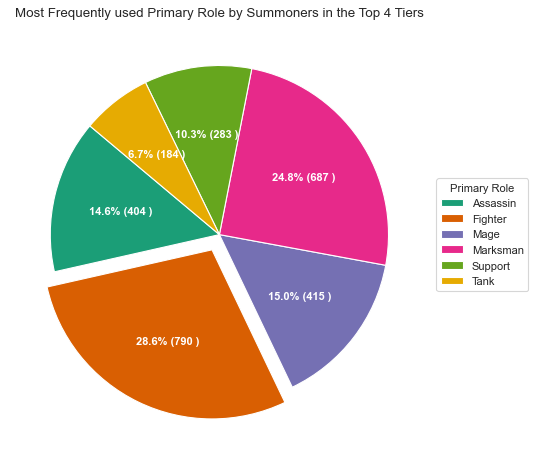

In [118]:
# Prepare Data
pie = DMGC_combined_df.groupby('Primary Role').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = pie['counts']
categories = pie['Primary Role']
explode = [0,0.1,0,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Primary Role", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Most Frequently used Primary Role by Summoners in the Top 4 Tiers")
plt.show()

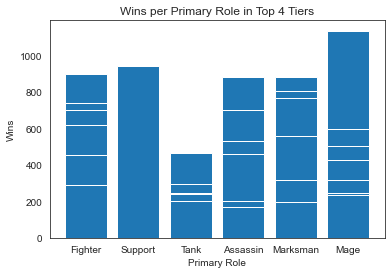

In [119]:
#Bar Graph of wins by primary role - correlate to popularity of role 
role = DMGC_combined_df['Primary Role']
wins = DMGC_combined_df['wins']

plt.bar(role,wins)
plt.xlabel("Primary Role")
plt.ylabel("Wins")
plt.title('Wins per Primary Role in Top 4 Tiers')
plt.show()

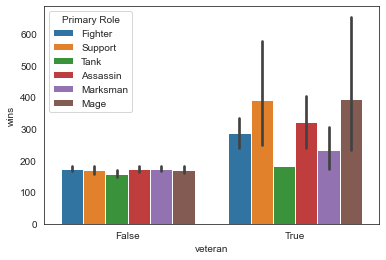

In [120]:
#Grouped Bar plot - Good way to incorporate veteran - but probably too hard to read - possibly do this for entire dataset, not specific tiers
sns.barplot(y = 'wins', x = 'veteran', hue = 'Primary Role', data=DMGC_combined_df)

TypeError: unsupported operand type(s) for +: 'int' and 'method'

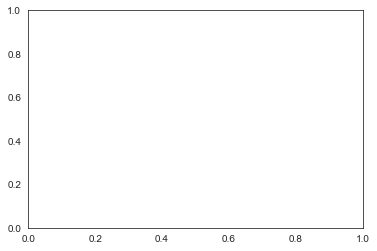

In [121]:
#Broken Code
##Stacked Bar graph by primary role - wins by veteran stack on wins by non veteran
primary_role = DMGC_combined_df['Primary Role']
veteran = DMGC_combined_df.loc[DMGC_combined_df['veteran'] == 'True', :]['wins'].value_counts
non_veteran = DMGC_combined_df.loc[DMGC_combined_df['veteran'] == 'False', :]['wins'].value_counts



n = 6
barWidth = .5
xloc = np.arange(n)

p1 = plt.bar(xloc, veteran, width=barWidth)
p2 = plt.bar(xloc, non_veteran, bottom=non_veteran, width=barWidth)
